<a href="https://colab.research.google.com/github/asengardeon/aprendizado_de_maquina/blob/master/Turma_2_Aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_titanic = pd.read_csv('titanic.csv', sep=',')
print(df_titanic.shape)
df_titanic.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            891 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  age_indicator  891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [ ]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='median', add_indicator=True)
transformed_age = si.fit_transform(df_titanic[['Age']])
transformed_age.shape

(891, 2)

In [ ]:
df_titanic.Age = transformed_age[:,0]
df_titanic = df_titanic.assign(age_indicator = transformed_age[:,1])
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_indicator
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [ ]:
df_titanic = df_titanic.assign(Family_size = df_titanic.apply(lambda x: x.SibSp + x.Parch, axis=1))
df_titanic[df_titanic.Pclass == 3][['Family_size', 'Fare']].corr()

,Family_size,Fare
Family_size,1.000000,0.805407
Fare,0.805407,1.000000


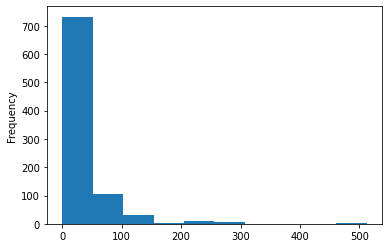

In [ ]:
df_titanic[['', 'Fare']].corr() .plot.hist()
#df_titanic[df_titanic.Survived == 1].Fare.plot.density()

In [ ]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,age_indicator
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.198653
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.399210
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [ ]:
# aqui fazemos um cruzamento entre as variáveis categóricas, onde uma delas
# é a nossa variável dependente, fazemos isso, porque estamos interessados
# em saber se a distribuição da nossa variável depende muda de acordo com os valores
# da variável independente. Se ocorrer essa mudança e ela for significativa, quer dizer
# que as variáveis são dependentes, mudando uma, impacto na proporção da outra.

df_cross_survived_pclass = pd.crosstab(df_titanic.Survived, df_titanic.Pclass)
df_cross_survived_pclass

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [ ]:
# podemos utilizar o teste estatístico chi2 na tabela de contingencia (cross-tab)
# que montamos anteriormente, para identificar se há dependência entre as variáveis
# a hipótese nula do teste é de que as variáveis são independentes.
from scipy.stats import chi2_contingency

# realizamos o teste estatístico e assumimos um valor de alpha = 5%
stats, p_value, dof, _ = chi2_contingency(df_cross_survived_pclass)
alpha = 0.05

# a um nível de significância de 5%, aceitamos/rejeitamos a hipótese nula.
if p_value < alpha:
    print('Rejeita o hipótese nula. As variáveis são dependentes')
else:
    print('Aceita o hipótese nula. As variáveis são independentes.')

Rejeita o hipótese nula. As variáveis são dependentes


In [ ]:
df_titanic.Ticket.value_counts()

1601           7
347082         7
CA. 2343       7
347088         6
CA 2144        6
              ..
229236         1
370373         1
237671         1
349223         1
SC/AH 29037    1
Name: Ticket, Length: 681, dtype: int64

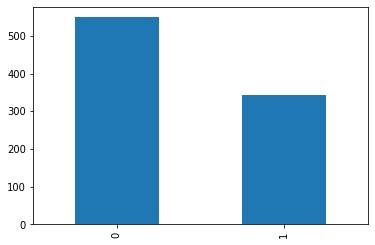

In [ ]:
df_titanic.Survived.value_counts().plot.bar()

In [ ]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_indicator,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,0


In [ ]:
df_titanic.Embarked = df_titanic.Embarked.fillna('?')
df_titanic = df_titanic[df_titanic.Embarked != '?']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

def build_models(alg: str):
    if alg == 'logistic_regression':
        model = GridSearchCV(
            LogisticRegression(n_jobs=-1),
            param_grid={
                'C': [0.0001, 0.001, 0.01, 0.1, 1],
                'class_weight': [None, 'balanced']
            },
            scoring='recall',
            cv=StratifiedKFold(10),
            n_jobs=-1,
            verbose=1
        )
        return model

def build_features(df_train, df_test):
    ohe = OneHotEncoder(sparse=False)
    ohe_train = ohe.fit_transform(df_train[['Pclass', 'Sex', 'Embarked']])
    ohe_test = ohe.transform(df_test[['Pclass', 'Sex', 'Embarked']])

    mm = MinMaxScaler()
    mm_train = mm.fit_transform(df_train[['Age', 'Family_size', 'Fare', 'age_indicator']]) 
    mm_test = mm.transform(df_test[['Age', 'Family_size', 'Fare', 'age_indicator']])

    x_train = np.hstack([ohe_train, mm_train])
    x_test = np.hstack([ohe_test, mm_test])

    y_train = df_train.Survived.values
    y_test = df_test.Survived.values

    return x_train, y_train, x_test, y_test

algs = ['logistic_regression']
# shape = (algoritmo, fold, métrica, dataset)
results_matrix = np.zeros(shape=(len(algs), 10, 4, 2))
for alg_index, alg in enumerate(algs):
    cv = StratifiedKFold(10, shuffle=True)
    for fold, (train, test) in enumerate(cv.split(df_titanic, df_titanic.Survived.values)):
        df_train = df_titanic.iloc[train]
        df_test = df_titanic.iloc[test]

        x_train, y_train, x_test, y_test = build_features(df_train, df_test)

        model = build_models(alg)
        model.fit(x_train, y_train)

        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)

        # acurácia, treino e teste
        results_matrix[alg_index, fold, 0, 0] = accuracy_score(y_train, y_pred_train)
        results_matrix[alg_index, fold, 0, 1] = accuracy_score(y_test, y_pred_test)

        p_train, r_train, f_train, _ = precision_recall_fscore_support(y_train, y_pred_train, average='binary')
        p_test, r_test, f_test, _ = precision_recall_fscore_support(y_test, y_pred_test, average='binary')

        # precisão, treino e teste
        results_matrix[alg_index, fold, 1, 0] = p_train
        results_matrix[alg_index, fold, 1, 1] = p_test

        # cobertura, treino e teste
        results_matrix[alg_index, fold, 2, 0] = r_train
        results_matrix[alg_index, fold, 2, 1] = r_test

        # fscore, treino e teste
        results_matrix[alg_index, fold, 3, 0] = f_train
        results_matrix[alg_index, fold, 3, 1] = f_test
    
    print('-' * 50)
    print(alg)
    print('-' * 50)
    print('Treino - Acurácia', results_matrix[alg_index,:,0,0].mean())
    print('Treino - Precisão', results_matrix[alg_index,:,1,0].mean())
    print('Treino - Cobertura', results_matrix[alg_index,:,2,0].mean())
    print('Treino - Medida F', results_matrix[alg_index,:,3,0].mean())
    print('-' * 50)
    print('Teste - Acurácia', results_matrix[alg_index,:,0,1].mean())
    print('Teste - Precisão', results_matrix[alg_index,:,1,1].mean())
    print('Teste - Cobertura', results_matrix[alg_index,:,2,1].mean())
    print('Teste - Medida F', results_matrix[alg_index,:,3,1].mean())
    print()

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.6s


--------------------------------------------------
logistic_regression
--------------------------------------------------
Treino - Acurácia 0.7906518414481898
Treino - Precisão 0.7122551485113358
Treino - Cobertura 0.7594771241830065
Treino - Medida F 0.7350794050868413
--------------------------------------------------
Teste - Acurácia 0.7852272727272728
Teste - Precisão 0.7097410777034096
Teste - Cobertura 0.7529411764705882
Teste - Medida F 0.7281870883349256



[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.3s finished


In [ ]:
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    y_pred_prob = model.predict_proba(x_test)[:,1]
    y_pred_prob = (y_pred_prob > threshold).astype(int)
    p, r, _, _ = precision_recall_fscore_support(y_test, y_pred_prob, average='binary')
    
    print('Threshold', threshold)
    print('Precisão', p)
    print('Cobertura', r)
    print('-' * 50)

Threshold 0.1
Precisão 0.38636363636363635
Cobertura 1.0
--------------------------------------------------
Threshold 0.2
Precisão 0.5081967213114754
Cobertura 0.9117647058823529
--------------------------------------------------
Threshold 0.3
Precisão 0.6
Cobertura 0.8823529411764706
--------------------------------------------------
Threshold 0.4
Precisão 0.7073170731707317
Cobertura 0.8529411764705882
--------------------------------------------------
Threshold 0.5
Precisão 0.8181818181818182
Cobertura 0.7941176470588235
--------------------------------------------------
Threshold 0.6
Precisão 0.8666666666666667
Cobertura 0.7647058823529411
--------------------------------------------------
Threshold 0.7
Precisão 0.9523809523809523
Cobertura 0.5882352941176471
--------------------------------------------------
Threshold 0.8
Precisão 0.9444444444444444
Cobertura 0.5
--------------------------------------------------
Threshold 0.9
Precisão 1.0
Cobertura 0.2647058823529412
------------

# Visualização da regressão logística (função sigmoid e da reta)

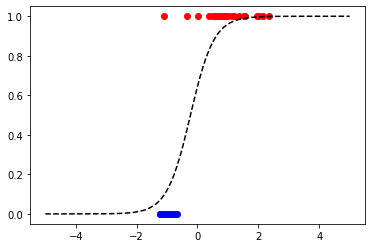

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

x, y = make_classification(n_samples=50, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, n_classes=2)

logistic_regression = LogisticRegression()
logistic_regression.fit(x, y)

plt.scatter(x[y == 0], y[y == 0], c='blue')
plt.scatter(x[y == 1], y[y == 1], c='red')

new_x = np.linspace(-5, 5, num=200)
new_y = list()

for n in new_x:
    prob = logistic_regression.predict_proba(n.reshape(-1, 1))
    new_y.append(prob[0,1])

plt.plot(new_x, new_y, 'k--')
plt.show()

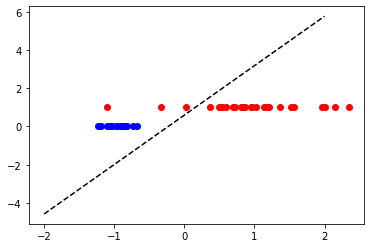

In [ ]:
plt.scatter(x[y == 0], y[y == 0], c='blue')
plt.scatter(x[y == 1], y[y == 1], c='red')

new_x = np.linspace(-2, 2, num=200)
new_y = list()

for n in new_x:
    _y = logistic_regression.intercept_ + (logistic_regression.coef_[0] * n)
    new_y.append(_y[0])

plt.plot(new_x, new_y, 'k--')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = logistic_regression.predict(x)
cm = confusion_matrix(y, y_pred)

print(cm)
print(classification_report(y, y_pred))

[[24  0]
 [ 2 24]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.92      0.96        26

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

